* 라이브러리 임포트

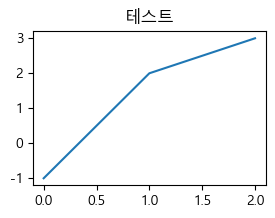

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

pd.Series([-1,2,3]).plot(title='테스트', figsize=(3,2))
pass


## 데이터 수집
* 상가상권정보<br>
https://www.data.go.kr/data/15083033/fileData.do

In [23]:
# ---------------------------
# 데이터 파일 리스트 생성
# ---------------------------

import glob

# data/폴더에서 '기상데이터'가 파일명에 포함된 모든 csv 파일
# 파일명 앞에는 한글자 이상의 다른 글자가 포함되어야 함

files = glob.glob("data/소상공인시장진흥공단_상가(상권)정보_20241231/소상공인시장진흥공단_상가(상권)정보*.csv")

# ---------------------------
# 데이터프레임 리스트 생성
# ---------------------------

df_list = []
for file in files:
    df_list.append(pd.read_csv(file, low_memory=False))

# ---------------------------
# 데이터프레임 연결
#   df_all
# ---------------------------

df_all = pd.concat(df_list ,ignore_index=True)


# ---------------------------
# 사용할 컬럼만 선택
# ---------------------------
df_stores = df_all[['상호명','상권업종대분류명','상권업종중분류명','상권업종소분류명','시도명','시군구명','행정동명','법정동명','경도', '위도']].copy()


In [24]:
df_stores.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,경도,위도
0,클러버,음식,주점,요리 주점,강원특별자치도,삼척시,정라동,정상동,129.185165,37.436915
1,최병영법률사무소,과학·기술,법무관련,변호사,강원특별자치도,인제군,인제읍,인제읍,128.173517,38.066837
2,깡통,소매,섬유·의복·신발 소매,남성 의류 소매업,강원특별자치도,원주시,일산동,일산동,127.948875,37.348471
3,금수강산컨설팅,부동산,부동산 서비스,부동산 중개/대리업,강원특별자치도,평창군,진부면,진부면,128.577368,37.659378
4,우리약초,소매,식료품 소매,채소/과일 소매업,강원특별자치도,횡성군,공근면,공근면,127.959972,37.530858


In [25]:
# ----------------------------------------
# 시도별 업종 대분류별 상가 갯수
# ----------------------------------------

df_pivot = df_stores.pivot_table(index='시도명',
                      columns='상권업종대분류명',
                      values='상호명',
                      aggfunc='count',
                      margins=True)

df_pivot

상권업종대분류명,과학·기술,교육,보건의료,부동산,소매,수리·개인,숙박,시설관리·임대,예술·스포츠,음식,All
시도명,,,,,,,,,,,
강원특별자치도,5757,6226,1830,2525,27514,11764,8376,4195,4274,38931,111392
경기도,72241,57098,17476,30795,156125,79053,10447,28217,30389,191044,672885
경상남도,9934,7867,1413,5830,44138,22649,6620,5923,6660,65908,176942
경상북도,7757,5744,939,4048,39046,18463,6336,5191,5619,53869,147012
광주광역시,7469,4119,1093,3684,20018,11013,792,3042,3576,23342,78148
대구광역시,9692,6761,1486,4157,31475,16003,1041,4053,5116,39837,119621
대전광역시,6878,5209,1930,2557,20857,10690,721,3208,3701,24838,80589
부산광역시,13250,7736,2304,6046,40480,20868,2646,5778,6159,56172,161439
서울특별시,94499,44525,18743,25189,118697,53048,8246,24801,20902,144885,553535


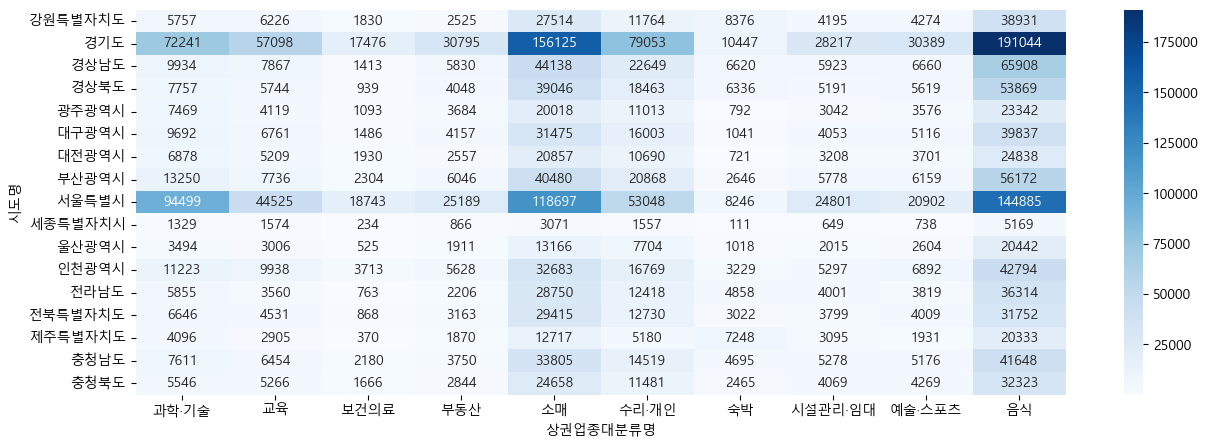

In [26]:
# ----------------------------------------
# 시도별 업종 대분류별 상가 갯수 시각화
# ----------------------------------------

plt.figure(figsize=(15,5))
sns.heatmap(df_pivot.iloc[:-1, :-1], cmap='Blues', annot=True, fmt='d');

## 시도별 상권분석

In [41]:
# ----------------------------------------
# 시도 선택
# ----------------------------------------

sido_input = input('시도명 : ')
cond = df_stores['시도명'].str.contains(sido_input)

try :
    sido_name = df_stores.loc[cond]['시도명'].drop_duplicates().iloc[0]
    print(sido_name)
except :
    print("input error")

서울특별시


In [42]:
# ----------------------------------------
# 시도의 데이터 선택
# ----------------------------------------

cond = df_stores['시도명']==sido_name
df_sido = df_stores.loc[cond]


In [43]:
# ----------------------------------------
# 선택한 시도의 구별 - 업종 대분류별 상가 갯수
# ----------------------------------------

df_sido_pivot = df_sido.pivot_table(index='시군구명', 
                    columns='상권업종대분류명',
                    values='상호명',
                    aggfunc='count',
                    margins=True)

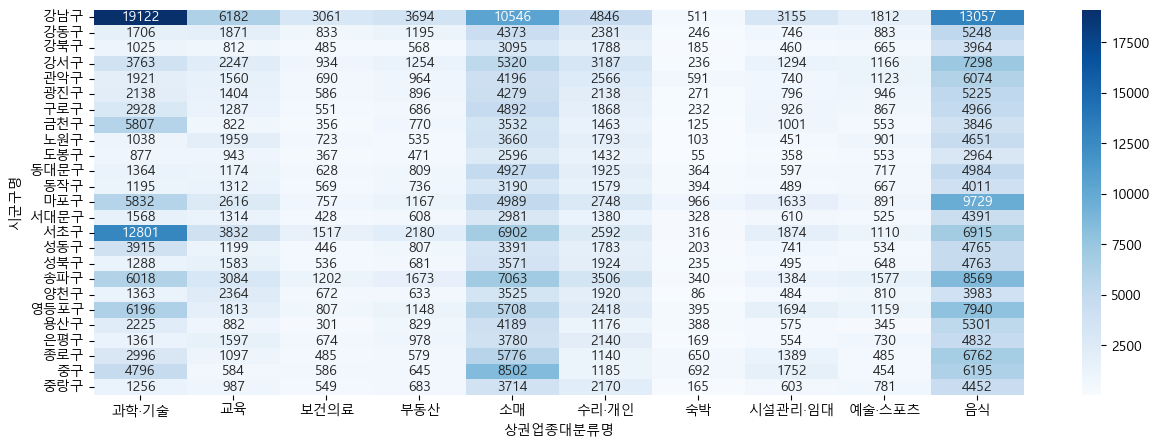

In [48]:
# ----------------------------------------
# 선택한 시도의 구별 - 업종 대분류별 상가 갯수 시각화
# ----------------------------------------

plt.figure(figsize=(15,5))
sns.heatmap(df_sido_pivot.iloc[:-1, :-1], cmap='Blues', annot=True, fmt='d');


In [45]:
# ------------------------------------------------
# 라이브러리 import
# ------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json


In [46]:
cond = df_sido['상권업종대분류명'].str.contains('과학')
df_science_locations = df_sido.loc[cond, ['상호명','위도','경도']]
df_science_locations


,상호명,위도,경도
1548044,동진산업,37.568826,126.991386
1548046,재진스크린,37.480338,126.896019
1548083,시온상사,37.568799,126.989858
1548099,하나로인테리어,37.601966,126.908680
1548102,에이스엔지니어링,37.502935,127.048551
...,...,...,...
2101502,싸인디자인,37.474878,127.047086
2101512,마쥬네,37.490183,127.030632
2101536,법무법인화우,37.510354,127.061032
2101553,테마고속여행,37.489763,126.933840


In [47]:
############################################################################################
# 1. 서울시청을 중심으로 지도 생성
############################################################################################
# 서울시 위도, 경도
loc = (37.5642135,127.0016985)

m = folium.Map(location=loc
            , zoom_start=11
            # , tiles = 'CartoDB Positron'
            , width=600
            , height=400
            )


# ----------------------------------------------
# 2. 마커 생성
# ----------------------------------------------
for i in df.index:
    gubun = df.iloc[i,0]
    name = df.iloc[i,1]
    tel = df.iloc[i,2]
    lon = df.iloc[i,3]
    lat = df.iloc[i,4]

    folium.Marker([lat, lon]
                  , tooltip=name
                  , popup=tel
                  , icon=folium.Icon(color=color_gubun)).add_to(m)
m

NameError: name 'df' is not defined